In [1]:
import pandas as pd

df = pd.read_csv("emotion.csv")

df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
df.shape

(16000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [7]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

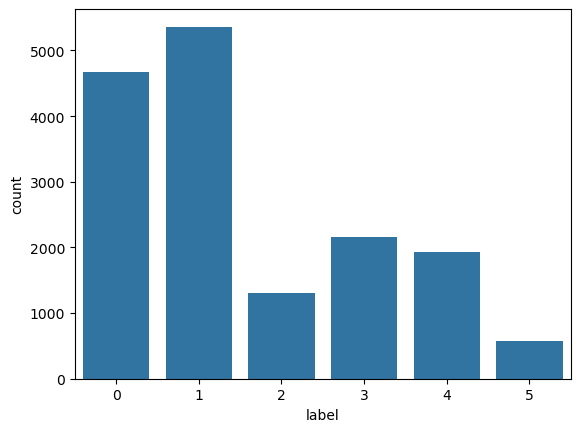

In [9]:
import seaborn as sns

sns.countplot(x=df.label)

In [11]:
# checkingh for missing values

df.isna().sum()

text     0
label    0
dtype: int64

In [13]:
# convert text into lower case

df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikitha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# filter stopwords

from nltk.corpus import stopwords

stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [39]:
# Do lemmatization

from nltk.stem import WordNetLemmatizer

from textblob import Word

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['text'].head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['text'])

X = X.toarray()

y = df.label.values

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, \

                                                test_size=0.2, shuffle=True)

In [25]:
from sklearn.naive_bayes import GaussianNB

 

#Initialize GaussianNB classifier

model = GaussianNB()

#Fit the model on the train dataset

model = model.fit(X_train, y_train)

#Make predictions on the test dataset

pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

 

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 35.0 %


In [37]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest classifier, 100 trees

clf_rf=RandomForestClassifier()

 

#Train the model using the training sets

clf_rf.fit(X_train,y_train)

 

rf_pred=clf_rf.predict(X_test).astype(int)

In [30]:
print("Accuracy:",accuracy_score(y_test, rf_pred))

Accuracy: 0.8778125


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,rf_pred))  

print(classification_report(y_test,rf_pred))

[[868  26   5  28  18   1]
 [ 29 952  25   5   8   2]
 [  3  76 208   6   3   0]
 [ 21  25   3 366  11   1]
 [ 17  16   2  16 335  11]
 [  4   8   0   0  21  80]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       946
           1       0.86      0.93      0.90      1021
           2       0.86      0.70      0.77       296
           3       0.87      0.86      0.86       427
           4       0.85      0.84      0.84       397
           5       0.84      0.71      0.77       113

    accuracy                           0.88      3200
   macro avg       0.87      0.83      0.84      3200
weighted avg       0.88      0.88      0.88      3200



In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced') 

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred))  

print(classification_report(y_test, y_pred))

[[845  29  12  32  22   6]
 [ 20 910  70   6   6   9]
 [  0  19 268   3   4   2]
 [ 12  11   3 385  13   3]
 [ 13  12   2  17 328  25]
 [  3   1   0   0  12  97]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       946
           1       0.93      0.89      0.91      1021
           2       0.75      0.91      0.82       296
           3       0.87      0.90      0.89       427
           4       0.85      0.83      0.84       397
           5       0.68      0.86      0.76       113

    accuracy                           0.89      3200
   macro avg       0.84      0.88      0.86      3200
weighted avg       0.89      0.89      0.89      3200

